In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv('Student Mental health.csv')
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


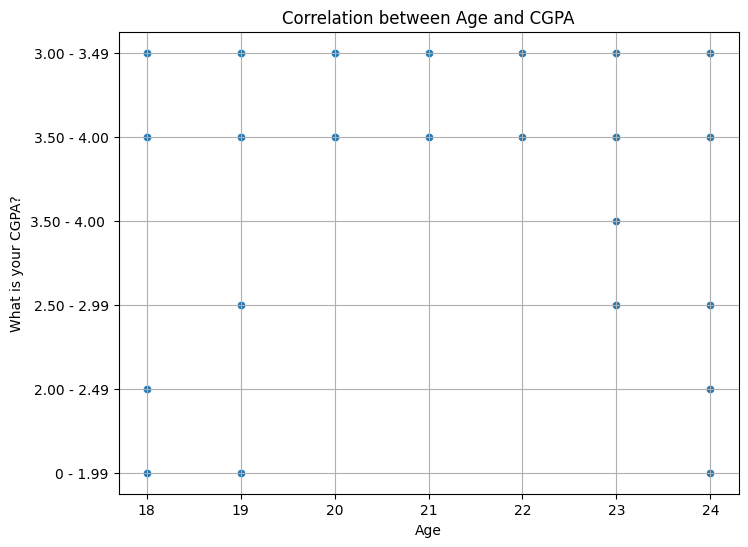

In [3]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Age', y='What is your CGPA?')
plt.title('Correlation between Age and CGPA')
plt.grid()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_7640\1945120368.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = 'Age',y = 'What is your CGPA?', data=df, palette='Blues')


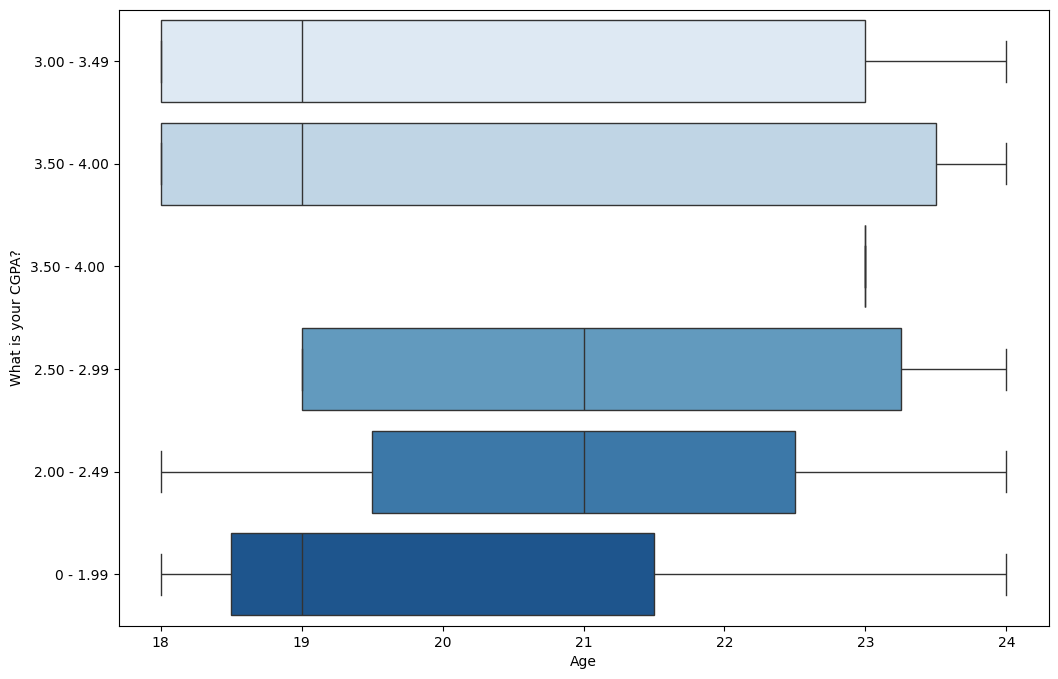

In [4]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x = 'Age',y = 'What is your CGPA?', data=df, palette='Blues')

In [9]:
encoder = LabelEncoder()
category = df.select_dtypes(include=['object','category'])
for x in category:
    df[x] = encoder.fit_transform(df[x])
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,23,0,18.0,17,3,3,0,1,0,1,0
1,24,1,21.0,25,4,3,0,0,1,0,0
2,25,1,19.0,4,0,3,0,1,1,1,0
3,26,0,22.0,33,5,3,1,1,0,0,0
4,27,1,23.0,37,6,3,0,0,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

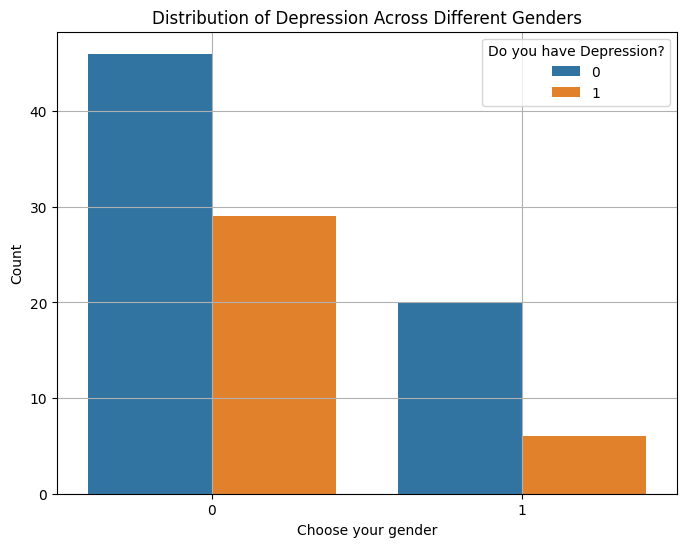

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x ='Choose your gender', hue='Do you have Depression?',  data=df)
plt.title('Distribution of Depression Across Different Genders')
plt.xlabel('Choose your gender')
plt.ylabel('Count')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

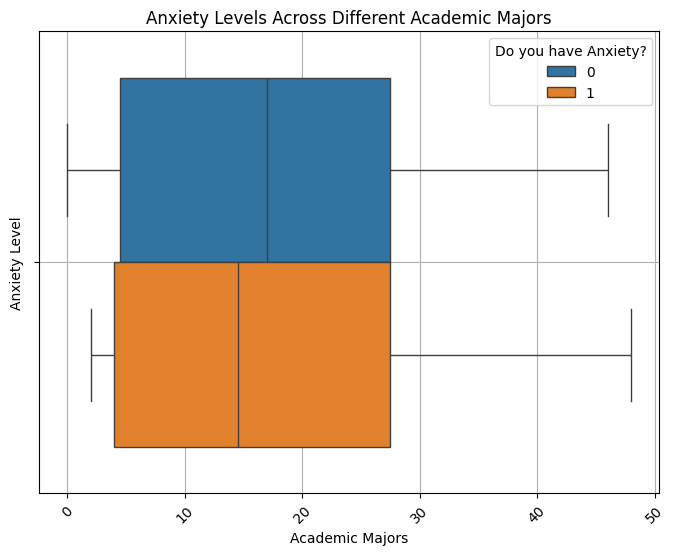

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x ='What is your course?', hue='Do you have Anxiety?',  data=df)
plt.title('Anxiety Levels Across Different Academic Majors')
plt.xlabel('Academic Majors')
plt.ylabel('Anxiety Level')
plt.xticks(rotation=45)
plt.grid(True)
plt.show

C:\Users\USER\AppData\Local\Temp\ipykernel_7640\2124646171.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x ='Your current year of Study', y='What is your CGPA?',  data=df, ci=None)


<function matplotlib.pyplot.show(close=None, block=None)>

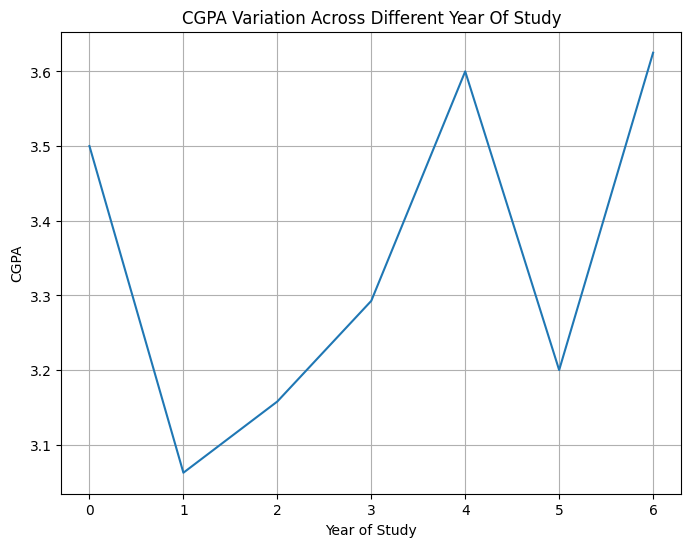

In [14]:
plt.figure(figsize=(8, 6))
sns.lineplot(x ='Your current year of Study', y='What is your CGPA?',  data=df, ci=None)
plt.title('CGPA Variation Across Different Year Of Study')
plt.xlabel('Year of Study')
plt.ylabel('CGPA')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

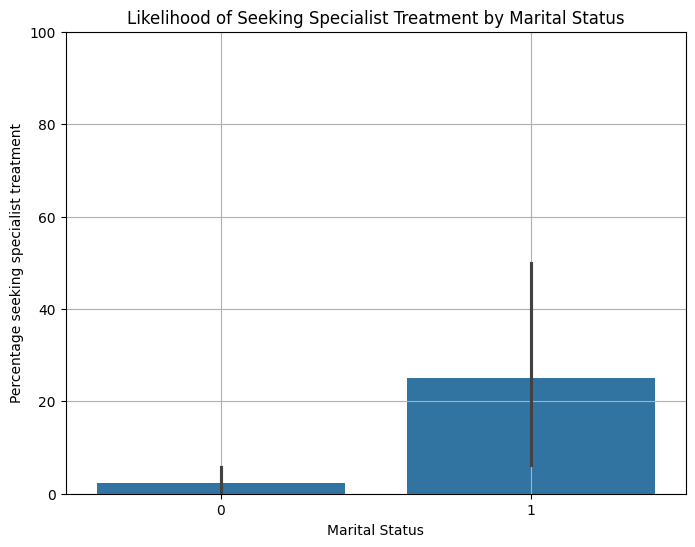

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(x ='Marital status', y='Did you seek any specialist for a treatment?',  data=df, estimator=lambda x: sum(x) / len(x) * 100)
plt.title('Likelihood of Seeking Specialist Treatment by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Percentage seeking specialist treatment')
plt.ylim(0, 100)
plt.grid(True)
plt.show

In [17]:
Anxiety = df['Do you have Anxiety?']
Panic_Attacks = df['Do you have Panic attack?']

correlation = np.corrcoef(Anxiety, Panic_Attacks)[0, 1]
print('Correlation coefficient between Anxiety and Panic_Attacks:', correlation)

Correlation coefficient between Anxiety and Panic_Attacks: 0.08447828353133648


In [23]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_time = df.groupby(df['Timestamp'])

<function matplotlib.pyplot.show(close=None, block=None)>

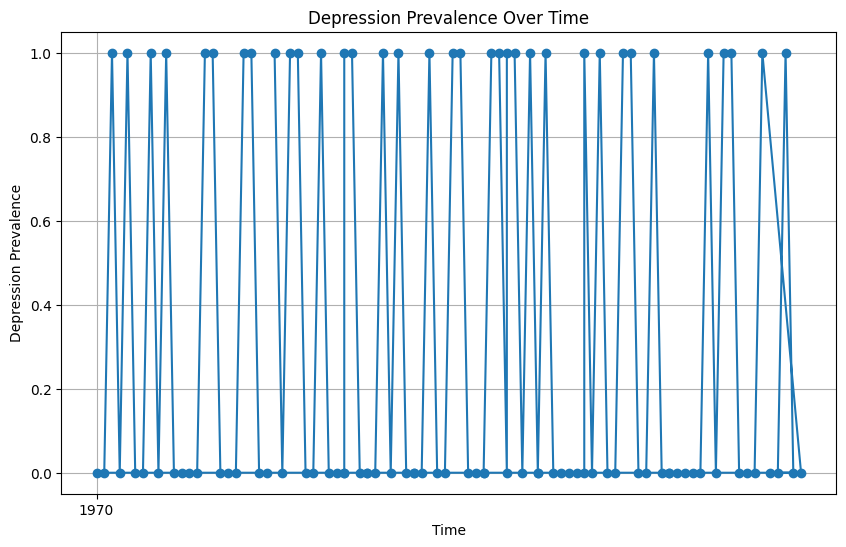

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Do you have Depression?'], marker='o')
plt.title('Depression Prevalence Over Time')
plt.xlabel('Time')
plt.ylabel('Depression Prevalence')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

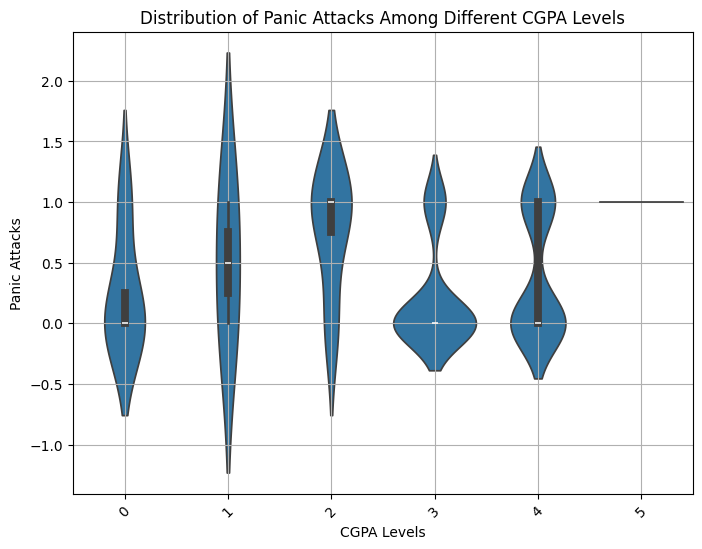

In [27]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='What is your CGPA?', y='Do you have Panic attack?', data=df)
plt.title('Distribution of Panic Attacks Among Different CGPA Levels')
plt.xlabel('CGPA Levels')
plt.ylabel('Panic Attacks')
plt.xticks(rotation=45)
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

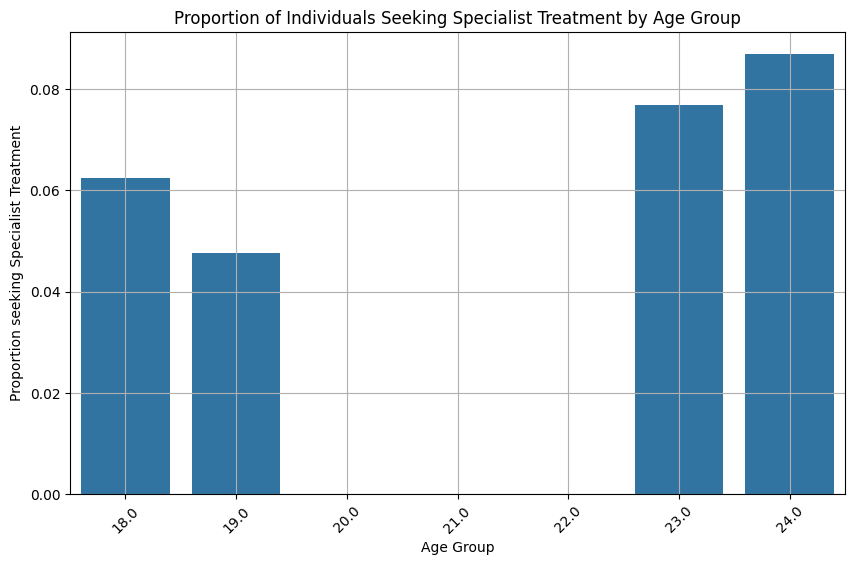

In [30]:
df_age = df.groupby('Age')['Did you seek any specialist for a treatment?'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Did you seek any specialist for a treatment?', data=df_age)
plt.title('Proportion of Individuals Seeking Specialist Treatment by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion seeking Specialist Treatment')
plt.xticks(rotation=45)
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

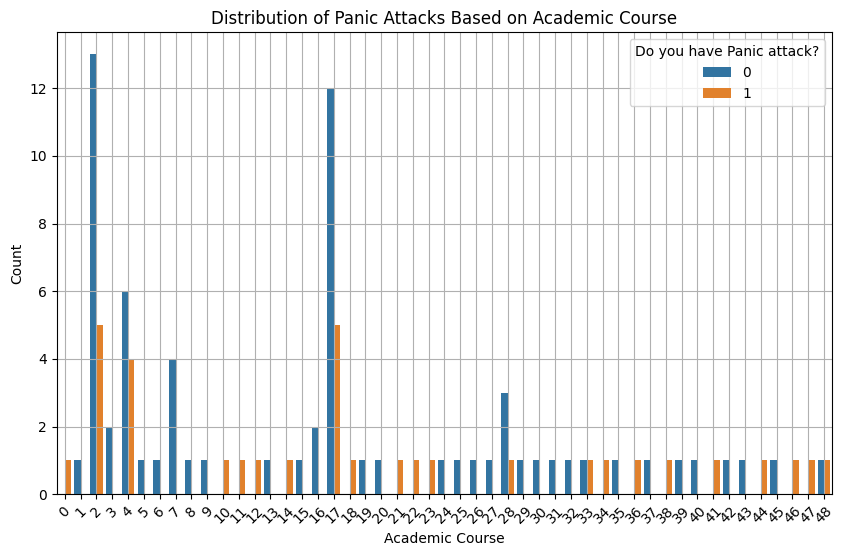

In [34]:
df_course = df.groupby('What is your course?')['Do you have Panic attack?'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.countplot(x='What is your course?', hue='Do you have Panic attack?', data=df)
plt.title('Distribution of Panic Attacks Based on Academic Course')
plt.xlabel('Academic Course')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show